In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\zzaid\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
df  = pd.read_csv('D:/data projects/Health Insurance Cost Prediction/insurance.csv')

In [4]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()


,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [12]:
df['sex'] = df['sex'].map({'female' : 0, 'male' : 1})

In [13]:
df['sex']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

In [14]:
df['smoker'] = df['smoker'].map({'no' : 0, 'yes' : 1})

In [15]:
df['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [16]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
df['region'] = df['region'].map({'southwest' : 1, 'southeast' : 2, 'northwest' : 3, 'northeast' : 4})

In [18]:
df['region'] 

0       1
1       2
2       2
3       3
4       3
       ..
1333    3
1334    4
1335    2
1336    1
1337    3
Name: region, Length: 1338, dtype: int64

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [20]:
X = df.drop(['charges'],axis =1)

In [21]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,4
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,1


In [22]:
y = df['charges']

In [23]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)


GradientBoostingRegressor()

In [26]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'lr':y_pred1,'svm':y_pred2 ,'rf':y_pred3 ,'gr':y_pred4})

In [27]:
df1

,Actual,lr,svm,rf,gr
764,9095.06825,8924.407244,9548.261584,10497.667880,11001.128629
887,5272.17580,7116.295018,9492.515425,5463.467493,5840.174656
890,29330.98315,36909.013521,9648.758701,28295.053802,28001.980112
1293,9301.89355,9507.874691,9555.044136,10357.087967,9745.291602
259,33750.29180,27013.350008,9420.421978,34515.649745,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47224.322955,45431.423211
575,12222.89830,11814.555568,9625.431547,12518.771577,12465.025294
535,6067.12675,7638.107736,9504.168517,6436.821910,6974.336525
543,63770.42801,40959.081722,9605.004594,46789.053456,47862.047791


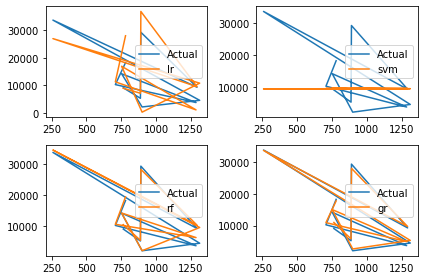

In [28]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label ='Actual')
plt.plot(df1['lr'].iloc[0:11],label ='lr')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label ='Actual')
plt.plot(df1['svm'].iloc[0:11],label ='svm')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label ='Actual')
plt.plot(df1['rf'].iloc[0:11],label ='rf')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label ='Actual')
plt.plot(df1['gr'].iloc[0:11],label ='gr')
plt.legend()

plt.tight_layout()


In [29]:
from sklearn import metrics
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [30]:
 print(score1,score2,score3,score4)

0.7833463107364539 -0.07229762787861826 0.8636322299415771 0.8779936181637191


In [31]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2= metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [32]:
print(s1,s2,s3,s4)

4186.508898366434 8592.428727899724 2457.155446539615 2447.167158715135


In [33]:
data= {'age': 19,
       'sex':0,
       'bmi' :27.900,
       'childern' :0,
       'smoker' : 1,
       'region' : 1
    }
df2 = pd.DataFrame(data,index=[0])
df2

,age,sex,bmi,childern,smoker,region
0,19,0,27.9,0,1,1


In [34]:
result = gr.predict(df2)

In [35]:
result

array([17792.46608893])

In [37]:
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [38]:
import joblib

In [39]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [40]:
model = joblib.load('model_joblib_gr')

In [43]:
model.predict(df2)

array([18901.83209496])